# FIFA 21 IRONHACK COMPETITION

# PART (I)

**Link to repo: https://github.com/ironhack-edu/data_project_FIFA_21**


You will use the fifa21_trainning.csv dataset provided to predict the position ('OVA') of each player. The competition will take place from monday morning to tuesday. 
<br><br>
Your model will be saved in a pickle file.
<br><br>
The ranking of the competitors will be calculated according to the highest Mean Average Error (MAE), rounded to 2 decimals.
<br><br>
Ties will be broken using, respectively: R2 Score (rounded to 2 decimals), Root Mean Squared Error (rounded to 2 decimals), time to run the code (using timeit)
<br>

## DELIVERABLES:

Your group should deliver a `group Jupyter notebook` with all the preprocessing functions alongside with the model.

Everything must be delivered until 12am on Tuesday. 
<br><br>
Be prepared to share your work on Tuesday morning, the best scores will have the opportunity to show their notebook and go through their pipeline (~10 min).
<br><br>

To deliver:
* A notebook with your work and model (group_number.ipynb);
* Pickle file with the model (group_number.pkl). 
<br><br>

The instructor will use your `group Jupyter notebook` to load a new dataset and use your functions and
your model to make a prediction in unseen data.


<br><br>

For this small project you are going to work in groups to put in practice some of the concepts of the previous week.

With your group mates, open the file in `file_for_project/fifa21_training.csv`. The objective is to create the best linear model to predict the column `OVA`.

You can find some documentation about the meaning of each column in the following links:

- [link - 0](https://sofifa.com/)
- [link - 1](https://gaming.stackexchange.com/questions/167318/what-do-fifa-14-position-acronyms-mean)
- [link - 2](https://www.fifauteam.com/fifa-ultimate-team-positions-and-tactics/)

### 1

Each member of the team should have his/her own _juypter_ notebook. In addition, each group should have a `group jupyter notebook`.

### 2

Decide which columns can be predictive and which ones can be directly dropped and take the needed actions.

### 3

Decide among the members of the group who is going to take care of inspecting the remaining columns
of the dataset. For example:
Member 1: cols 1 -> 5
Member 2: cols 6 -> 10
...
and so on

### 4

Each member must do:

- Explore their assigned columns and write python code to perform any cleanup operation that the assigned columns may need.
- Perform any scaling operation that the assigned column may need.

### 5

Put all the code of each member into the `group jupyter notebook`.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np    # numerical python, algebra library
import matplotlib.pyplot as plt 
import pycountry_convert
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso       # L1
from sklearn.linear_model import Ridge       # L2
from sklearn.linear_model import ElasticNet  # L1+L2
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv("./FIFA Project/file_for_project/fifa21_training.csv")

In [3]:
pd.set_option('display.max_columns', None)
data.head(2)

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77


In [4]:
pd.set_option('display.max_columns',None)
for i in data.columns:
    print(i)
    print(i,data[i].isna().sum())

Unnamed: 0
Unnamed: 0 0
ID
ID 0
Name
Name 0
Age
Age 0
Nationality
Nationality 0
Club
Club 21
BP
BP 0
Position
Position 343
Team & Contract
Team & Contract 0
Height
Height 0
Weight
Weight 0
foot
foot 0
Growth
Growth 0
Joined
Joined 44
Loan Date End
Loan Date End 12961
Value
Value 0
Wage
Wage 0
Release Clause
Release Clause 0
Contract
Contract 0
Attacking
Attacking 0
Crossing
Crossing 0
Finishing
Finishing 0
Heading Accuracy
Heading Accuracy 0
Short Passing
Short Passing 0
Volleys
Volleys 44
Skill
Skill 0
Dribbling
Dribbling 0
Curve
Curve 44
FK Accuracy
FK Accuracy 0
Long Passing
Long Passing 0
Ball Control
Ball Control 0
Movement
Movement 0
Acceleration
Acceleration 0
Sprint Speed
Sprint Speed 0
Agility
Agility 44
Reactions
Reactions 0
Balance
Balance 44
Power
Power 0
Shot Power
Shot Power 0
Jumping
Jumping 44
Stamina
Stamina 0
Strength
Strength 0
Long Shots
Long Shots 0
Mentality
Mentality 0
Aggression
Aggression 0
Interceptions
Interceptions 7
Positioning
Positioning 7
Vision
Vision 4

In [5]:
print(data.isna().sum().sum())
data=data.dropna()

14154


In [6]:
data.isna().sum().sum()

0

In [7]:
'''
print('Categorical Features:', len(cat_cols))
print('----------')
for c in cat_cols:
    print(f'Name: {data[c].name}')    # column name
    print(f'Type: {data[c].dtype}')   # column type
    print(f'Unique values: {len(data[c].unique())}')   # column unique values
    print(data[c].unique())
    print(((data[c].value_counts()/ sum(data[c].value_counts()))*100))   # percentage
    print('\n----------')
'''

"\nprint('Categorical Features:', len(cat_cols))\nprint('----------')\nfor c in cat_cols:\n    print(f'Name: {data[c].name}')    # column name\n    print(f'Type: {data[c].dtype}')   # column type\n    print(f'Unique values: {len(data[c].unique())}')   # column unique values\n    print(data[c].unique())\n    print(((data[c].value_counts()/ sum(data[c].value_counts()))*100))   # percentage\n    print('\n----------')\n"

C:\Users\SL241YM\AppData\Local\Temp\ipykernel_30176\337410816.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(corr, dtype=np.bool))     # generate a mask for the upper triangle


Text(79.80000000000004, 0.5, 'Eje de las y')

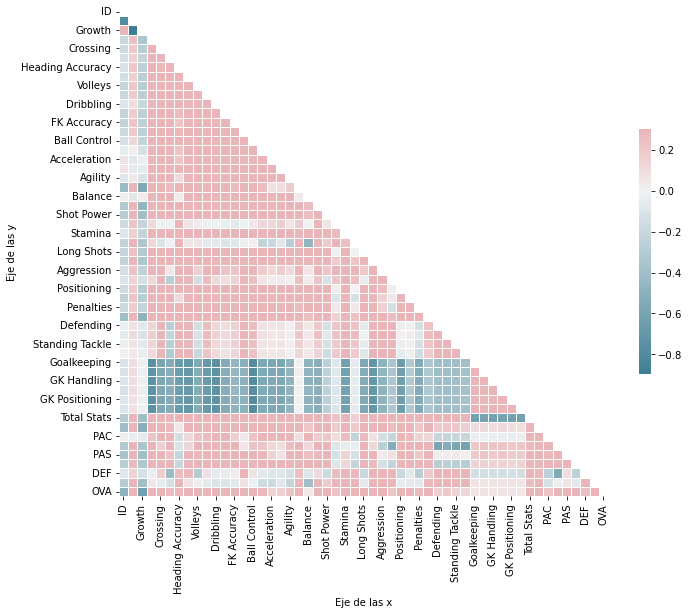

In [8]:
del data['Unnamed: 0']
corr=data.corr()      # compute the correlation matrix

mask=np.triu(np.ones_like(corr, dtype=np.bool))     # generate a mask for the upper triangle

f, ax=plt.subplots(figsize=(11, 9))                 # set up the matplotlib figure

cmap=sns.diverging_palette(220, 10, as_cmap=True)   # generate a custom diverging colormap

sns.heatmap(corr, mask=mask, cmap=cmap,             # draw the heatmap with the mask and correct aspect ratio
            vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5});

plt.xlabel('Eje de las x')
plt.ylabel('Eje de las y')

In [9]:
corr[np.abs(corr['OVA'])<0.05]

,ID,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY,OVA


In [10]:
noimport = corr[np.abs(corr['OVA'])<0.5]



In [11]:
corr_array = np.linspace(0, 0.9, 25)

models_linreg = []
y_predict_linreg = []

models_lasso = []
y_predict_lasso = []

models_ridge = []
y_predict_ridge = []

models_elastic = []
y_predict_elastic = []

models_xgbr = []
y_predict_xgbr = []

models_rfr = []
y_predict_rfr = []

models_lgbmr = []
y_predict_lgbmr = []

X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

In [12]:
for value in corr_array:
    data_for = data.copy()
    noimport = corr[np.abs(corr['OVA']) < value]
    data_for = data_for.drop(noimport.index, axis=1)
        
    cat_cols=[col for col in data_for.columns if (data_for[col].dtype==object)] 
    num_cols=[c for c in data_for.columns if (data_for[c].dtype!='object') and (c!='Effective To Date')]
    
    for c in num_cols[:-1]:   # we'll normalize all less the target column
        data_for[c]=StandardScaler().fit_transform(data_for[c].values.reshape(-1, 1))
    
    one_hot_data=pd.get_dummies(data_for[cat_cols], drop_first=True)   # one hot encoding categorical variables
    one_hot_data.head()
    
    
    data_for=pd.concat([data_for, one_hot_data], axis=1)   # concat dataframes
    data_for.drop(columns=cat_cols, inplace=True)
    
    # first, split X-y (learning-target data)
    X = data_for.drop(columns=['OVA'])
    y = data_for['OVA']
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)  # random state fixed sample
    
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
    
    # Linear regression
    
    linreg=LinReg()    # model
    linreg.fit(X_train, y_train)   # model train
    y_pred_linreg=linreg.predict(X_test)   # model prediction
    models_linreg.append(linreg)
    y_predict_linreg.append(y_pred_linreg)
    
    # Lasso L1

    lasso=Lasso()
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    models_lasso.append(lasso)
    y_predict_lasso.append(y_pred_lasso)

    # Ridge L2

    ridge=Ridge()
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    models_ridge.append(ridge)
    y_predict_ridge.append(y_pred_ridge)

    # ElasticNet L1+L2

    elastic=ElasticNet()
    elastic.fit(X_train, y_train)
    y_pred_elastic = elastic.predict(X_test)
    models_elastic.append(elastic)
    y_predict_elastic.append(y_pred_elastic)

    #xgbr
    
    from xgboost import XGBRegressor as XGBR
    xgbr=XGBR()
    xgbr.fit(X_train, y_train)
    y_pred_xgbr = xgbr.predict(X_test)
    models_xgbr.append(xgbr)
    y_predict_xgbr.append(y_pred_xgbr)
    
    #rfr

    rfr=RFR()
    rfr.fit(X_train, y_train)
    y_pred_rfr = rfr.predict(X_test)
    models_rfr.append(rfr)
    y_predict_rfr.append(y_pred_rfr)
    
    #lgbmr
    #from lightgbm import LGBMRegressor as LGBMR

    #lgbmr=LGBMR()
    #lgbmr.fit(X_train, y_train)
    #y_pred_lgbmr = lgbmr.predict(X_test)
    #models_lgbmr.append(lgbr)
    #y_predict_lgbmr.append(y_pred_lgbmr)





C:\Users\SL241YM\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\SL241YM\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\SL241YM\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\SL241YM\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Us

In [13]:
X_test.shape

(146, 4959)

In [14]:
best_model_linreg = None
current_mse_linreg = np.inf
corr_linreg = None
best_test_mse = None
r2_best_mse = None

for i, corr in enumerate(corr_array):
    train_mse_linreg = mse(models_linreg[i].predict(X_train_list[i]), y_train_list[i]) #MSE
    test_mse_linreg = mse(y_predict_linreg[i], y_test_list[i])
    test_score_linreg = models_linreg[i].score(X_test_list[i], y_test_list[i])

    if test_mse_linreg < current_mse_linreg:
        current_mse_linreg = test_mse_linreg
        best_model_linreg = models_linreg[i]
        best_test_mse = test_mse_linreg
        r2_best_mse = test_score_linreg
        corr_linreg = corr
    
print (f'''Model linreg.\n
         Correlation threshold: {corr_linreg}\n
         MSE-Test: {best_test_mse}\n
         R2-Test: {r2_best_mse}\n
    ''')


Model linreg.

         Correlation threshold: 0.075

         MSE-Test: 3.8947675078758284

         R2-Test: 0.8539948503069186

    


In [15]:
best_model_lasso = None
current_mse_lasso = np.inf
corr_lasso = None
best_test_mse = None
r2_best_mse = None

for i, corr in enumerate(corr_array):
    #train_mse_lasso = mse(models_elastic[i].predict(X_train_list[i]), y_train_list[i]) #MSE
    test_mse_lasso = mse(y_predict_lasso[i], y_test_list[i])
    test_score_lasso = models_lasso[i].score(X_test_list[i], y_test_list[i])

    if test_mse_lasso < current_mse_lasso:
        current_mse_lasso = test_mse_lasso
        best_model_lasso = models_lasso[i]
        best_test_mse = test_mse_lasso
        r2_best_mse = test_score_lasso
        corr_lasso = corr
    
print (f'''Model lasso.\n
         Correlation threshold: {corr_lasso}\n
         MSE-Test: {best_test_mse}\n
         R2-Test: {r2_best_mse}\n
    ''')

Model lasso.

         Correlation threshold: 0.525

         MSE-Test: 6.443253589817408

         R2-Test: 0.758458443799422

    


In [16]:
best_model_xgbr = None
current_mse_xgbr = np.inf
corr_xgbr = None
best_test_mse = None
r2_best_mse = None

for i, corr in enumerate(corr_array):
    #train_mse_xgbr = mse(models_elastic[i].predict(X_train_list[i]), y_train_list[i]) #MSE
    test_mse_xgbr = mse(y_predict_xgbr[i], y_test_list[i])
    test_score_xgbr = models_xgbr[i].score(X_test_list[i], y_test_list[i])

    if test_mse_xgbr < current_mse_xgbr:
        current_mse_xgbr = test_mse_xgbr
        best_model_xgbr = models_xgbr[i]
        best_test_mse = test_mse_xgbr
        r2_best_mse = test_score_xgbr
        corr_xgbr = corr
    
print (f'''Model xgbr.\n
         Correlation threshold: {corr_xgbr}\n
         MSE-Test: {best_test_mse}\n
         R2-Test: {r2_best_mse}\n
    ''')

Model xgbr.

         Correlation threshold: 0.0

         MSE-Test: 2.4463315608566156

         R2-Test: 0.9082931124850169

    


In [17]:
best_model_ridge = None
current_mse_ridge = np.inf
corr_ridge = None
best_test_mse = None
r2_best_mse = None

for i, corr in enumerate(corr_array):
    #train_mse_ridge = mse(models_elastic[i].predict(X_train_list[i]), y_train_list[i]) #MSE
    test_mse_ridge = mse(y_predict_ridge[i], y_test_list[i])
    test_score_ridge = models_ridge[i].score(X_test_list[i], y_test_list[i])

    if test_mse_ridge < current_mse_ridge:
        current_mse_ridge = test_mse_ridge
        best_model_ridge = models_ridge[i]
        best_test_mse = test_mse_ridge
        r2_best_mse = test_score_ridge
        corr_ridge = corr
    
print (f'''Model ridge.\n
         Correlation threshold: {corr_ridge}\n
         MSE-Test: {best_test_mse}\n
         R2-Test: {r2_best_mse}\n
    ''')

Model ridge.

         Correlation threshold: 0.15

         MSE-Test: 3.8005962391671204

         R2-Test: 0.8575250970178708

    


In [18]:
best_model_rfr = None
current_mse_rfr = np.inf
corr_rfr = None
best_test_mse = None
r2_best_mse = None

for i, corr in enumerate(corr_array):
    #train_mse_rfr = mse(models_elastic[i].predict(X_train_list[i]), y_train_list[i]) #MSE
    test_mse_rfr = mse(y_predict_rfr[i], y_test_list[i])
    test_score_rfr = models_rfr[i].score(X_test_list[i], y_test_list[i])

    if test_mse_rfr < current_mse_rfr:
        current_mse_rfr = test_mse_rfr
        best_model_rfr = models_rfr[i]
        best_test_mse = test_mse_rfr
        r2_best_mse = test_score_rfr
        corr_rfr = corr
    
print (f'''Model rfr.\n
         Correlation threshold: {corr_rfr}\n
         MSE-Test: {best_test_mse}\n
         R2-Test: {r2_best_mse}\n
    ''')

Model rfr.

         Correlation threshold: 0.075

         MSE-Test: 2.519380821917807

         R2-Test: 0.9055546773217779

    


In [19]:
best_model_elastic = None
current_mse_elastic = np.inf
corr_elastic = None
best_test_mse = None
r2_best_mse = None

for i, corr in enumerate(corr_array):
    #train_mse_elastic = mse(models_elastic[i].predict(X_train_list[i]), y_train_list[i]) #MSE
    test_mse_elastic = mse(y_predict_elastic[i], y_test_list[i])
    test_score_elastic = models_elastic[i].score(X_test_list[i], y_test_list[i])

    if test_mse_elastic < current_mse_elastic:
        current_mse_elastic = test_mse_elastic
        best_model_elastic = models_elastic[i]
        best_test_mse = test_mse_elastic
        r2_best_mse = test_score_elastic
        corr_elastic = corr
    
print (f'''Model elastic.\n
         Correlation threshold: {corr_elastic}\n
         MSE-Test: {best_test_mse}\n
         R2-Test: {r2_best_mse}\n
    ''')


Model elastic.

         Correlation threshold: 0.075

         MSE-Test: 6.81823887923914

         R2-Test: 0.7444011776843045

    


In [26]:
import pickle
with open('bestmodel.pickle', 'wb') as handle:
    pickle.dump(models_xgbr,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
'''
with open('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)
'''

"\nwith open('filename.pickle', 'rb') as handle:\n    b = pickle.load(handle)\n"